In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense,Dropout
import matplotlib.pyplot as plt


In [7]:
# Buat data dummy
np.random.seed(42)
data = np.random.rand(100, 4)  # 100 baris, 3 features + 1 target
df = pd.DataFrame(data, columns=['temperature', 'humidity', 'wind_speed', 'rainfall'])

# Pisah features dan target
X = df[['temperature', 'humidity', 'wind_speed']].values
y = df['rainfall'].values

# Scaling data supaya GRU lebih mudah belajar
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
def create_sequences(X, y, timesteps):
    Xs, ys = [], []
    for i in range(len(X) - timesteps):
        Xs.append(X[i:i+timesteps])
        ys.append(y[i+timesteps])
    return np.array(Xs), np.array(ys)

# Set sequence length (misalnya 5 timesteps)
timesteps = 5
X_seq, y_seq = create_sequences(X_scaled, y, timesteps)


In [9]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)


In [35]:
# Model GRU
model = Sequential()

# Tambahkan layer GRU

model.add(GRU(units=32, return_sequences=True, 
                 # Tambahkan L2 regularization
              input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


d:\cursor_code\python\Lstm\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_11 (GRU)                    │ (None, 5, 32)          │         3,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5, 1)           │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,585 (14.00 KB)

 Trainable params: 3,585 (14.00 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0936 - val_loss: 0.0778
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0753 - val_loss: 0.0776
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0813 - val_loss: 0.0776
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0862 - val_loss: 0.0776
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0764 - val_loss: 0.0776
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0825 - val_loss: 0.0776
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0885 - val_loss: 0.0776
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0800 - val_loss: 0.0777
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0906 - val_loss: 0.0776
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0759 - val_loss: 0.0778
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0822 - val_loss: 0.0776
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0845 - val_loss: 0.0775
Epoch 1

In [44]:
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[[0.5058478 ],
        [0.49853426],
        [0.49490842],
        [0.49127716],
        [0.4917583 ]],

       [[0.47786754],
        [0.49686033],
        [0.48742035],
        [0.4934569 ],
        [0.49844944]],

       [[0.46867055],
        [0.48795   ],
        [0.48961622],
        [0.49247432],
        [0.4909231 ]],

       [[0.4726107 ],
        [0.4889989 ],
        [0.49404117],
        [0.49014536],
        [0.48816922]],

       [[0.50270224],
        [0.4960152 ],
        [0.49135506],
        [0.48621163],
        [0.48856145]],

       [[0.47896695],
        [0.48507017],
        [0.49190968],
        [0.48592418],
        [0.48453265]],

       [[0.48835254],
        [0.49278826],
        [0.49593127],
        [0.49902993],
        [0.49371505]],

       [[0.48160237],
        [0.49410123],
        [0.49002373],
        [0.48439807],
        [0.4840673 ]],

       [[0.46259242],
        [0.49065214],
        [0.49987894],
        [0.48790962],
        [0.48116

ValueError: x and y can be no greater than 2D, but have shapes (19,) and (19, 5, 1)

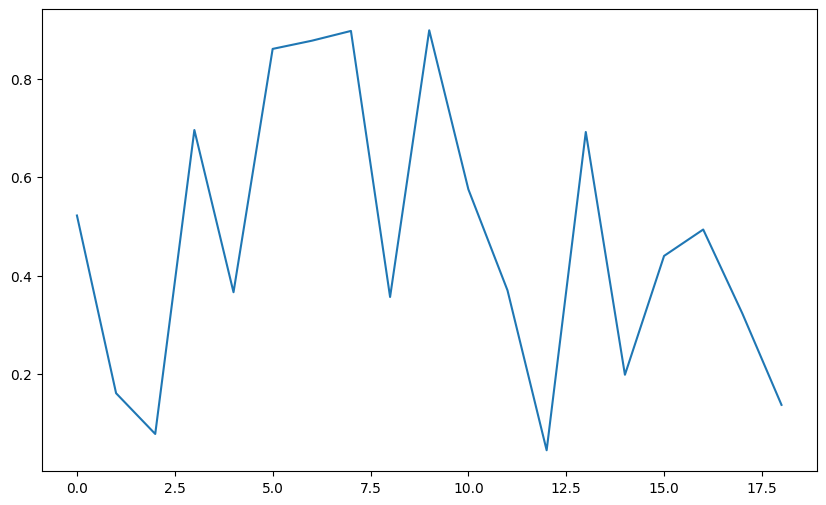

In [43]:
# Prediksi di data test

# Plot hasil prediksi vs aktual
plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predict')
plt.title('Actual vs Predict Rainfall')
plt.xlabel('Data Points')
plt.ylabel('Rainfall')
plt.legend()
plt.show()


In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_test, y_pred)
r2

-0.18693538435968615